# Loan Prediction 03 - Training and Validation of first models

We propose two models of different nature to predict the Loan approval: Logistic Regression and Random Forest.

- Forest Based Algorithms: Flexibility treating variance in data; Can handle categorical and numerical data; Can handle missing data; Can overcome multicollinearity;
- Regressors: can show direct relationship between inputs and output; Variable Selection;

Now, let us train and validate our models with the preprocessed dataset

In [233]:
import math
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import metrics_utils 
import model_utils

In [234]:
df_import = pd.read_csv('dataset/train_loan_preprocessed.csv')
print(df_import.shape)
display(df_import.head(10))

(530, 14)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Base_Loan_Installment,Remaining_Income
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0,355.555556,0.941626
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0,183.333333,0.938889
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0,333.333333,0.932537
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0,391.666667,0.934722
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0,741.666667,0.922848
5,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,2.0,1.0,263.888889,0.931440
6,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,1.0,0.0,438.888889,0.920778
7,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,2.0,1.0,466.666667,0.915642
8,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,1.0,0.0,969.444444,0.959282
9,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.0,360.0,1.0,2.0,1.0,194.444444,0.950142


In [235]:
columns_x = df_import.drop(columns=['Loan_Status']).columns
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [236]:
scaler = MinMaxScaler()
scaler.fit(df_import[columns_x])
dump(scaler, 'saves/minmax_scaler.bin', compress=True)

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [237]:
display(X_train_norm.describe())
print(X_train_norm.shape)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.823113,0.650943,0.249214,0.221698,0.136792,0.064581,0.037308,0.225717,0.687978,0.832547,0.497642,0.100589,0.944258
std,0.382024,0.477235,0.338416,0.415880,0.344034,0.072559,0.067158,0.134044,0.148552,0.373821,0.388966,0.089234,0.058631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034326,0.000000,0.153976,0.729730,1.000000,0.000000,0.059053,0.939509
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046024,0.024744,0.196277,0.729730,1.000000,0.500000,0.078520,0.950392
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.070077,0.054222,0.263959,0.729730,1.000000,1.000000,0.110967,0.961290
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999524


(424, 13)


In [238]:
display(X_validation_norm.describe())
print(X_validation_norm.shape)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.792453,0.603774,0.279874,0.169811,0.094340,0.063555,0.048593,0.246081,0.698368,0.830189,0.551887,0.104914,0.945191
std,0.407477,0.491436,0.338490,0.377251,0.293689,0.081231,0.095400,0.145520,0.123326,0.377251,0.395987,0.079064,0.030329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000742,0.000000,0.069374,0.108108,0.000000,0.000000,0.032446,0.716911
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.032260,0.000000,0.162437,0.729730,1.000000,0.000000,0.061648,0.939605
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.041002,0.036984,0.208968,0.729730,1.000000,0.500000,0.082090,0.948748
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069397,0.058002,0.297800,0.729730,1.000000,1.000000,0.122648,0.957222
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.781534,0.812082,1.000000,1.000000,1.000000,1.000000,0.630110,1.000000


(106, 13)


### Logistic Regression Classifier

In [239]:
lr = LogisticRegression(random_state=0,solver='lbfgs');
lr.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(lr,X_validation_norm,y_validation);

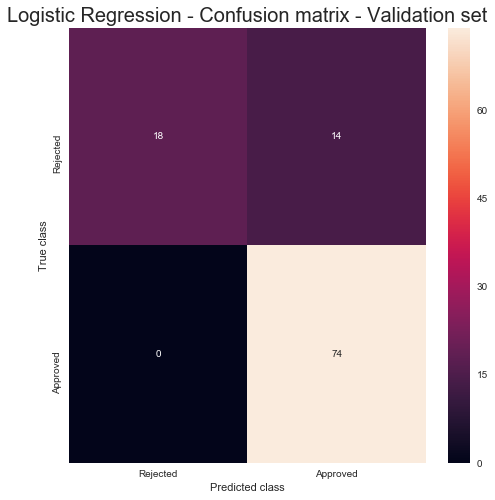

              precision    recall  f1-score   support

    Rejected       1.00      0.56      0.72        32
    Approved       0.84      1.00      0.91        74

    accuracy                           0.87       106
   macro avg       0.92      0.78      0.82       106
weighted avg       0.89      0.87      0.86       106

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.840


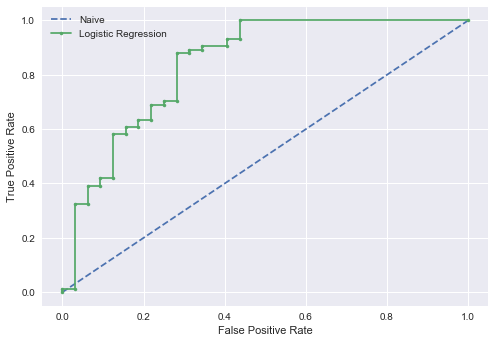

In [240]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation_norm, y_test = y_validation)

### Ridge Regressor Classification

In [241]:
ridge = RidgeClassifier(random_state=0);
ridge.fit(X_train_norm.values,y_train.values.ravel());
df_result = model_utils.predict(ridge,X_validation_norm,y_validation);

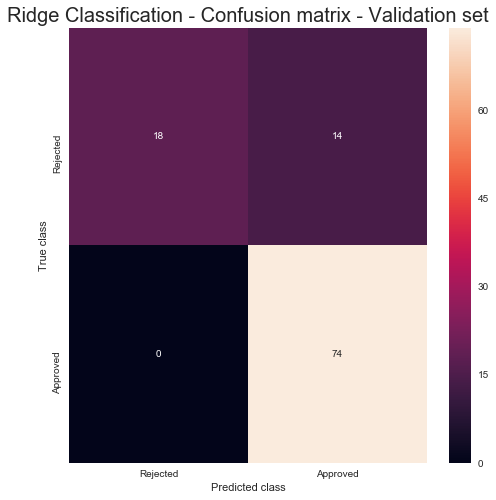

              precision    recall  f1-score   support

    Rejected       1.00      0.56      0.72        32
    Approved       0.84      1.00      0.91        74

    accuracy                           0.87       106
   macro avg       0.92      0.78      0.82       106
weighted avg       0.89      0.87      0.86       106



In [242]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Ridge Classification')
metrics_utils.show_performance(df_result)
# metrics_utils.plot_ROC(model = ridge,model_name = 'Ridge Classification',X_test = X_validation_norm, y_test = y_validation)

### Random Forest Classifier

In [243]:
rfc = RandomForestClassifier(
            n_estimators = 500,
            min_samples_split = 2,
            max_depth = 13,
            random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

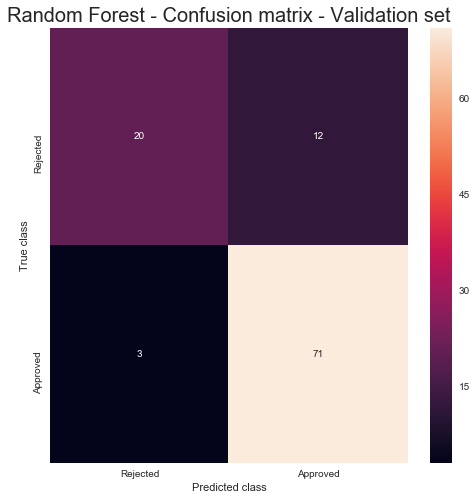

              precision    recall  f1-score   support

    Rejected       0.87      0.62      0.73        32
    Approved       0.86      0.96      0.90        74

    accuracy                           0.86       106
   macro avg       0.86      0.79      0.82       106
weighted avg       0.86      0.86      0.85       106

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.851


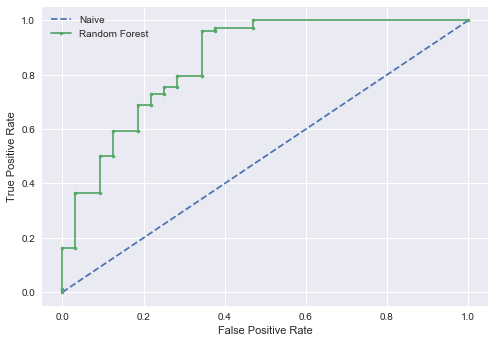

In [244]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation_norm, y_test = y_validation)

### Gradient Boosting

In [245]:
gboost = GradientBoostingClassifier(
            n_estimators = 200,
            min_samples_split = 3,
            random_state = 0)
gboost.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(gboost,X_validation_norm,y_validation)

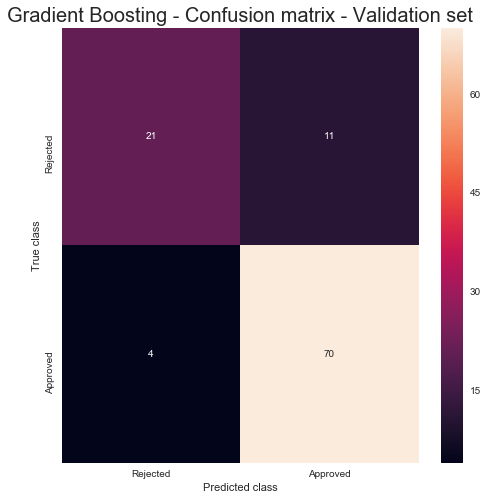

              precision    recall  f1-score   support

    Rejected       0.84      0.66      0.74        32
    Approved       0.86      0.95      0.90        74

    accuracy                           0.86       106
   macro avg       0.85      0.80      0.82       106
weighted avg       0.86      0.86      0.85       106

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.816


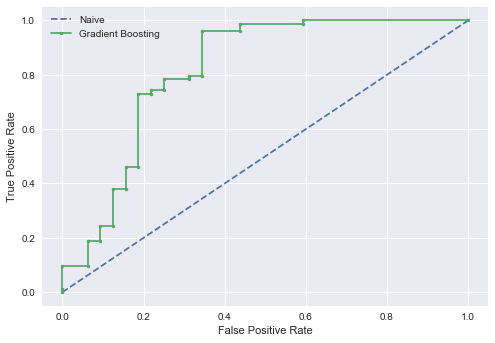

In [246]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Gradient Boosting')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = gboost,model_name = 'Gradient Boosting',X_test = X_validation_norm, y_test = y_validation)

In [247]:
#TODO: Execute a small grid search to tune models
#TODO: Execute grid search with CROSS VALIDATION
#TODO: Apply a RFE wrapper to check for variable selection
#TODO: Apply other models

### Conclusion

The best performing classifiers were the Random Forest and Gradient Boosting. 

We can point out the Random Forest had a more sensitive outcome than the Gradient Boosting. Therefore, the Gradient Boosting model is a more selective model when compared to the Random Forest. 

The regression models had slightly inferior performance, but still had a good performance.

Let us see (in the next notebooks) how these models will perform when the missing data is filled by a Random Forest algorithm.

In [248]:
dump(rfc, 'saves/random_forest_classifier.bin', compress=True)

['saves/random_forest_classifier.bin']